In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
DATA_FOLDER = '../DATA'
files = os.listdir(DATA_FOLDER)
sds_files = [i for i in files if 'sds011' in i]
bme_files = [i for i in files if 'bme280' in i]
dht_files = [i for i in files if 'dht22' in i]

In [3]:
data = pd.read_csv(os.path.join(
    DATA_FOLDER, '26717_bme280_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)
data.head()

,sensor_id,sensor_type,location,lat,lon,pressure,altitude,pressure_sealevel,temperature,humidity
timestamp,,,,,,,,,,
2019-05-27 18:12:41,26717,BME280,14325,55.684,37.584,99031.29,NaN,NaN,18.46,43.94
2019-05-27 18:15:22,26717,BME280,14325,55.684,37.584,99037.25,NaN,NaN,18.39,44.21
2019-05-27 18:17:56,26717,BME280,14325,55.684,37.584,99032.41,NaN,NaN,18.33,44.31
2019-05-27 18:20:30,26717,BME280,14325,55.684,37.584,99032.87,NaN,NaN,18.35,44.31
2019-05-27 18:23:03,26717,BME280,14325,55.684,37.584,99031.01,NaN,NaN,18.33,44.49


In [4]:
sensors_data =[]

In [5]:
idx = pd.date_range('2019-04-01', '2019-12-10', freq='5T')

In [6]:
sds_data = pd.DataFrame(idx, columns=['date'])
sds_data = sds_data.set_index('date')

In [7]:
bme_data = pd.DataFrame(idx, columns=['date'])
bme_data = bme_data.set_index('date')

In [8]:
from pandas.errors import EmptyDataError
for f in bme_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['pressure'] = data.pressure.replace('unavailable', None)
        data['temperature'] = data.temperature.replace('unavailable', None)
        data['humidity'] = data.humidity.replace('unavailable', None)
        data['pressure'] = data.pressure.astype(float)
        data['temperature'] = data.temperature.astype(float)
        data['humidity'] = data.humidity.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        bme_data['pressure_'+str(s_id)] = new_data.pressure
        bme_data['temperature_'+str(s_id)] = new_data.temperature
        bme_data['humidity_'+str(s_id)] = new_data.humidity
    except EmptyDataError:
        pass

In [9]:
from pandas.errors import EmptyDataError
for f in sds_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['P1'] = data.P1.replace('unavailable', None)
        data['P2'] = data.P2.replace('unavailable', None)
        data['P1'] = data.P1.astype(float)
        data['P2'] = data.P2.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        sds_data['P1_'+str(s_id)] = new_data.P1
        sds_data['P2_'+str(s_id)] = new_data.P2
    except EmptyDataError:
        pass

/home/anatoly/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
sensors = pd.DataFrame(sensors_data, columns=['sensor_id', 'sensor_type', 'lat', 'lon'])

In [11]:
bme_data.head()

,pressure_26717,temperature_26717,humidity_26717,pressure_32440,temperature_32440,humidity_32440,pressure_35435,temperature_35435,humidity_35435,pressure_32710,...,humidity_35443,pressure_32338,temperature_32338,humidity_32338,pressure_30732,temperature_30732,humidity_30732,pressure_34670,temperature_34670,humidity_34670
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
p1_col = [i for i in sds_data.columns if 'P1_' in i]
p2_col = [i for i in sds_data.columns if 'P2_' in i]

In [13]:
temp_col = [i for i in bme_data.columns if 'temperature_' in i]
pres_col = [i for i in bme_data.columns if 'pressure_' in i]
hum_col = [i for i in bme_data.columns if 'humidity_' in i]

In [14]:
avg_data = pd.DataFrame(idx, columns=['date'])
avg_data = avg_data.set_index('date')

In [15]:
avg_data['P1'] = sds_data[p1_col].mean(axis = 1, skipna = True)
avg_data['P2'] = sds_data[p2_col].mean(axis = 1, skipna = True)
avg_data['pressure'] = bme_data[pres_col].mean(axis = 1, skipna = True)
avg_data['temperature'] = bme_data[temp_col].mean(axis = 1, skipna = True)
avg_data['humidity'] = bme_data[hum_col].mean(axis = 1, skipna = True)
avg_data['P1_std'] = sds_data[p1_col].std(axis = 1, skipna = True)
avg_data['P2_std'] = sds_data[p2_col].std(axis = 1, skipna = True)
avg_data['pressure_std'] = bme_data[pres_col].std(axis = 1, skipna = True)
avg_data['temperature_std'] = bme_data[temp_col].std(axis = 1, skipna = True)
avg_data['humidity_std'] = bme_data[hum_col].std(axis = 1, skipna = True)

In [16]:
d = avg_data
d.iloc[-1]

P1                    30.380517
P2                    17.937693
pressure           98822.427006
temperature            5.808772
humidity              72.230283
P1_std                11.587179
P2_std                 5.905497
pressure_std         361.669242
temperature_std        4.407446
humidity_std          24.782700
Name: 2019-12-10 00:00:00, dtype: float64

In [17]:
# split dataframe
weeks = [g for n, g in d.groupby(pd.Grouper(freq='7D'))]

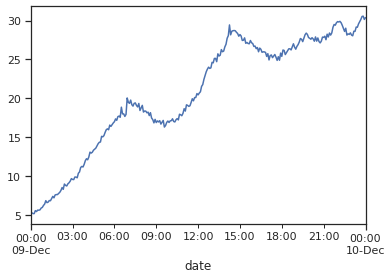

In [18]:
weeks[-1].P1.plot()

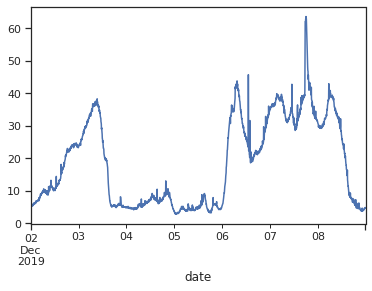

In [19]:
weeks[len(weeks)-2].P1.plot()

In [20]:
w = weeks[-3]

In [21]:
w['P1'] = w.P1.interpolate()

In [22]:
w['P1'] = w.P1.rolling(4, min_periods=1).mean()

In [23]:
w.head()

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std
date,,,,,,,,,,
2019-11-25 00:00:00,14.894350,6.663778,101191.336742,-2.962828,52.592721,5.862293,2.457720,367.656345,4.908199,20.843871
2019-11-25 00:05:00,14.721344,6.573957,101174.068406,-3.027836,53.101126,5.949923,2.557943,384.355104,4.810985,20.513270
2019-11-25 00:10:00,15.319946,6.762893,101171.823500,-3.042243,53.012386,15.316637,2.647697,389.768029,4.869241,20.731427
2019-11-25 00:15:00,15.126317,6.690761,101169.175605,-3.087565,53.136500,6.329640,2.739993,388.081864,4.888582,20.796264
2019-11-25 00:20:00,15.140918,6.814267,101165.616864,-3.101593,53.190856,6.341974,2.734663,390.582261,4.899628,20.820331


In [24]:
freq = round(60*25/5) # 1 day
decomp = sm.tsa.seasonal_decompose(w.P1, model='additive', freq=freq, extrapolate_trend='freq')

In [25]:
decomp.resid.mean(), decomp.resid.median(), decomp.resid.std(), decomp.resid.quantile(0.8)

(0.4890161474132866, 0.14152916014536437, 9.687209587136755, 6.334928515557304)

In [26]:
q = decomp.resid.quantile(0.9)

In [27]:
idx = decomp.resid[abs(decomp.resid)>q].index
idx[0]

Timestamp('2019-11-26 07:55:00')

(737388.0, 737394.9965277778)

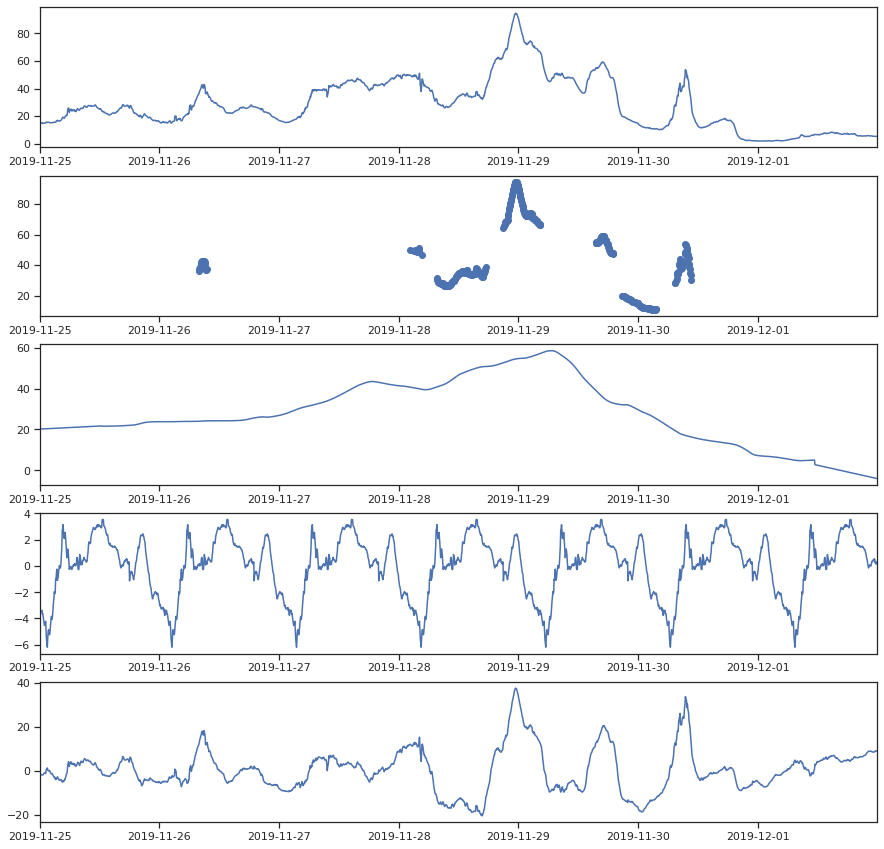

In [28]:
f, axs = plt.subplots(5,1,figsize=(15,15))
axs[0].plot(decomp.observed)
axs[1].plot(decomp.observed[idx], 'o')
axs[2].plot(decomp.trend)
axs[3].plot(decomp.seasonal)
axs[4].plot(decomp.resid)
axs[0].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
axs[1].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
axs[2].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
axs[3].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
axs[4].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))

In [29]:
w['trend'] = decomp.trend
w['seasonal'] = decomp.seasonal
w['resid'] = decomp.resid
w['anomaly'] = abs(w.resid)>q

In [67]:
anomaly = w[w['anomaly']]
anomaly['gap'] = (anomaly.index.to_series().diff()) > pd.Timedelta(5, 'm')

/home/anatoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
anomaly[anomaly.gap]

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std,trend,seasonal,resid,anomaly,gap
date,,,,,,,,,,,,,,,
2019-11-26 09:20:00,36.574489,12.228826,100220.515958,-0.830148,47.210449,34.382249,8.089280,409.386859,4.437526,18.886928,24.212939,0.196473,12.165076,True,True
2019-11-26 09:35:00,37.548742,11.410333,100225.177207,-0.587701,48.340106,33.015084,4.493862,404.756846,4.300889,18.934300,24.220353,0.406943,12.921447,True,True
2019-11-28 02:20:00,49.580661,20.177676,97297.936131,1.376929,63.133991,19.556432,7.658193,14201.188174,3.969871,22.753876,40.675379,-3.269301,12.174583,True,True
2019-11-28 03:00:00,49.252373,20.265799,97156.248639,1.319806,62.528556,23.033983,8.750606,14665.783173,3.999611,23.058315,40.372896,-3.628731,12.508209,True,True
2019-11-28 03:10:00,49.951260,22.010833,99366.563125,1.418594,65.121875,22.220843,8.632140,381.029167,4.478109,21.066249,40.316126,-3.373813,13.008947,True,True
2019-11-28 03:35:00,48.737392,20.464195,96913.345500,1.635347,60.363708,23.114156,9.230315,15559.702664,4.234985,24.018960,40.156417,-3.618717,12.199692,True,True
2019-11-28 04:05:00,48.976163,21.452500,95911.916607,2.044028,63.052321,20.334467,8.392772,18605.559707,5.256440,18.262836,39.926178,-4.460335,13.510320,True,True
2019-11-28 04:45:00,46.934248,20.751389,93936.634722,2.367099,58.076944,20.381639,7.440580,23197.590644,6.103123,25.417361,39.576958,-4.854638,12.211927,True,True
2019-11-28 07:40:00,31.791593,12.909329,97339.894190,1.911570,56.618028,12.842706,4.979120,14207.206778,4.011617,20.856468,40.816598,3.144427,-12.169433,True,True


In [69]:
l_mod = pd.to_datetime(anomaly[anomaly.gap].index)
l_mod

DatetimeIndex(['2019-11-26 09:20:00', '2019-11-26 09:35:00',
               '2019-11-28 02:20:00', '2019-11-28 03:00:00',
               '2019-11-28 03:10:00', '2019-11-28 03:35:00',
               '2019-11-28 04:05:00', '2019-11-28 04:45:00',
               '2019-11-28 07:40:00', '2019-11-28 12:25:00',
               '2019-11-28 21:00:00', '2019-11-29 15:30:00',
               '2019-11-29 20:50:00', '2019-11-30 07:25:00',
               '2019-11-30 07:40:00'],
              dtype='datetime64[ns]', name='date', freq=None)

In [73]:
l = [anomaly[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]
l = [i for i in l if len(i) > 12]

In [74]:
for i in l:
    print(i)

                            P1         P2      pressure  temperature  \
date                                                                   
2019-11-28 07:40:00  31.791593  12.909329  97339.894190     1.911570   
2019-11-28 07:45:00  30.252488  12.431477  95801.474821     2.019048   
2019-11-28 07:50:00  29.068918  12.893229  97148.853886     1.953318   
2019-11-28 07:55:00  29.015316  12.439399  97242.149351     1.969489   
2019-11-28 08:00:00  28.568221  12.407456  97367.056939     2.107951   
2019-11-28 08:05:00  28.640998  12.302673  97365.898605     2.109126   
2019-11-28 08:10:00  28.439100  12.378466  97366.033730     2.166066   
2019-11-28 08:15:00  28.208460  12.294276  97362.460147     2.176710   
2019-11-28 08:20:00  28.154986  12.365005  97358.701933     2.182333   
2019-11-28 08:25:00  27.963893  12.114715  97355.465204     2.199573   
2019-11-28 08:30:00  27.528181  12.071162  97308.956944     2.251875   
2019-11-28 08:35:00  27.633003  12.451864  97245.845878     1.71